In [43]:
import pandas as pd
import numpy as np
from functions import abbreviate_positions
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [44]:
df = pd.read_csv("final_data.csv")
df

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000000,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000000,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000000,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,/aidan-simmons/profil/spieler/867763,Western Sydney Wanderers,Aidan Simmons,Attack-RightWinger,181.240353,20.0,16,0.175953,0.087977,0.263930,...,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,/kusini-yengi/profil/spieler/708099,Western Sydney Wanderers,Kusini Yengi,Attack Centre-Forward,190.000000,24.0,26,0.372671,0.186335,0.186335,...,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,/nathanael-blair/profil/spieler/1023268,Western Sydney Wanderers,Nathanael Blair,Attack Centre-Forward,181.240353,19.0,20,0.375000,0.000000,0.187500,...,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,/zachary-sapsford/profil/spieler/703657,Western Sydney Wanderers,Zachary Sapsford,Attack Centre-Forward,181.240353,20.0,17,0.312139,0.104046,0.000000,...,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

# Data Cleaning and Wrangling

- Verifying the missing values

In [46]:
#verify the missing values
df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

- Round every numerical value to 2 decimal number

In [47]:
#round everything to 2 decimal places
df = df.round(2)

- Removing unnecessary columns

In [48]:
#remove player, position_encoded andwinger columns
df = df.drop(['player', 'position_encoded', 'winger'], axis=1)


In [49]:
df.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000


- Mapping positions

In [50]:
#position unique values
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [51]:
# Apply the function to the 'position' column
df['position'] = df['position'].apply(abbreviate_positions)

In [52]:
df.sample(2)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
9265,Al-Batin FC,Juan Sebastián Pedroza,MF,176.0,24.0,18,0.00,0.12,0.18,0.06,0.00,0.0,0.0,1523,0,0,0,600000,800000
910,Eintracht Frankfurt,Randal Kolo Muani,ATT,187.0,24.0,87,0.46,0.31,0.12,0.01,0.01,0.0,0.0,7035,4,1,2,65000000,65000000


- Convert age column to integer

In [53]:
#pass age to int
df['age'] = df['age'].astype(int)

In [54]:
df.head(1)

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,Manchester United,David de Gea,GK,189.0,32,104,0.0,0.0,0.01,0.0,0.0,1.22,0.34,9390,42,5,13,15000000,70000000


- Convert categorical variables to numerical

In [55]:
df.drop(columns="name", inplace=True)

- Turn categorical columns into numerical and normalize the data.

In [56]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA


# Aplicar One-Hot Encoding a las columnas categóricas 'team' y 'position'
encoder = OneHotEncoder(sparse=False)
encoded_team_position = encoder.fit_transform(df[['team', 'position']])

# Convertir los datos codificados a un DataFrame con nombres de columnas apropiados
encoded_df = pd.DataFrame(encoded_team_position, columns=encoder.get_feature_names_out(['team', 'position']))

# Concatenar las columnas codificadas con las demás columnas numéricas
df_encoded = df.drop(['team', 'position'], axis=1)
df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

# Aplicar PCA solo a las columnas de One-Hot Encoding
pca = PCA(n_components=10)  # Ajusta el número de componentes según sea necesario
pca_components = pca.fit_transform(df_encoded[encoded_df.columns])

# Convertir los componentes principales a un DataFrame
pca_df = pd.DataFrame(pca_components, columns=[f'PCA_{i+1}' for i in range(pca_components.shape[1])])

# Concatenar los componentes principales con las demás columnas numéricas
df_final = pd.concat([df_encoded.drop(columns=encoded_df.columns), pca_df], axis=1)

# Mostrar las primeras filas del DataFrame final
df_final.head()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10
0,189.0,32,104,0.00,0.00,0.01,0.0,0.0,1.22,0.34,...,-0.065926,0.037753,1.020202,0.045214,0.002432,-0.016720,0.025429,0.029765,0.013883,-0.033297
1,196.0,30,15,0.00,0.00,0.07,0.0,0.0,1.24,0.21,...,-0.065926,0.037753,1.020202,0.045214,0.002432,-0.016720,0.025429,0.029765,0.013883,-0.033297
2,188.0,37,4,0.00,0.00,0.00,0.0,0.0,0.62,0.92,...,-0.065926,0.037753,1.020202,0.045214,0.002432,-0.016720,0.025429,0.029765,0.013883,-0.033297
3,175.0,25,82,0.03,0.06,0.22,0.0,0.0,0.00,0.00,...,0.770510,-0.122265,-0.108772,0.044209,0.002747,-0.017711,0.024544,0.030729,0.013410,-0.032872
4,191.0,30,63,0.02,0.02,0.05,0.0,0.0,0.00,0.00,...,0.770510,-0.122265,-0.108772,0.044209,0.002747,-0.017711,0.024544,0.030729,0.013410,-0.032872


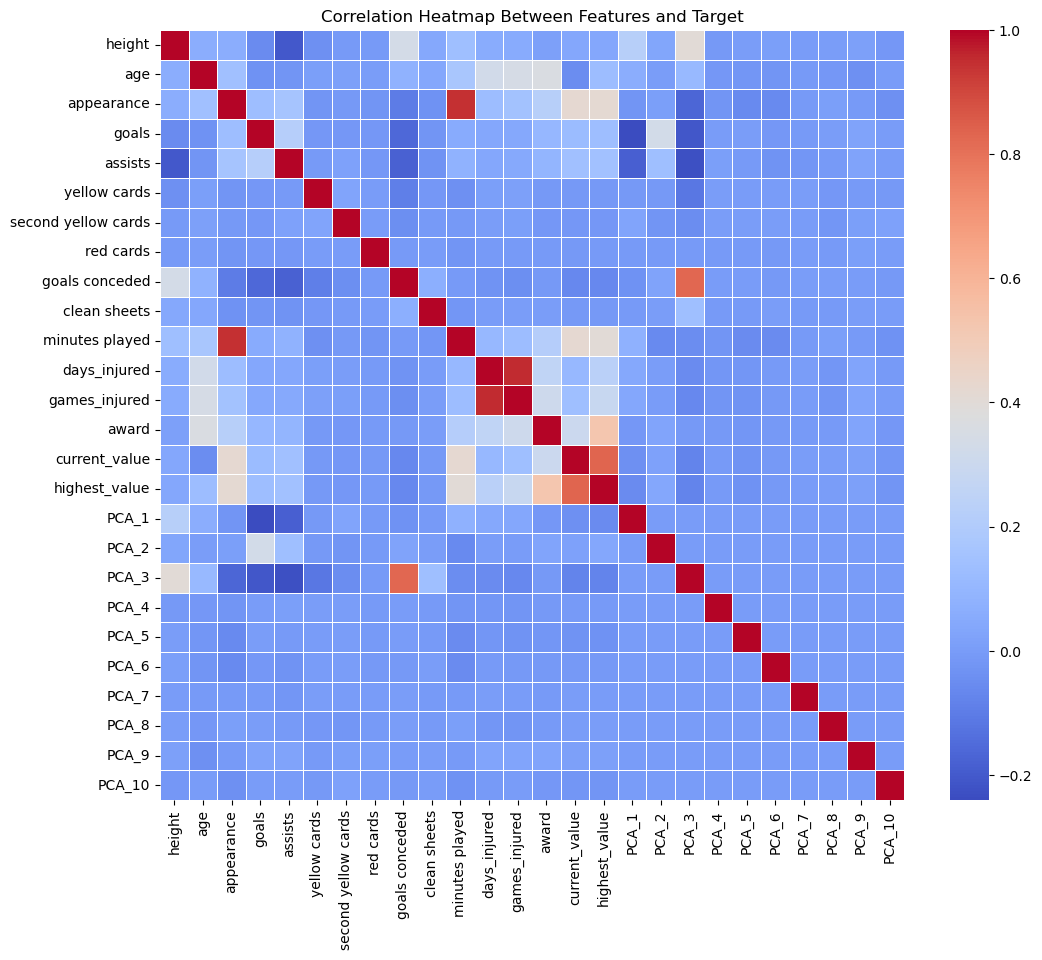

In [57]:
# Crear la matriz de correlación
corr_matrix = df_final.corr()

# Crear un heatmap para mostrar la correlación entre las características y el target
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap Between Features and Target")
plt.show()

In [58]:
import plotly.express as px

# Calculate the correlation matrix
correlation_matrix = df_final.corr()

# Create the heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='RdBu_r',  # Red-Blue diverging color scale
                zmin=-1,
                zmax=1,
                aspect="auto",
                title='Correlation Heatmap of Numerical Variables')

# Update the layout for better readability
fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    xaxis={'side': 'top'},  # Move x-axis labels to the top
    width=800,
    height=700
)

# Add correlation values as text annotations
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        fig.add_annotation(
            x=correlation_matrix.columns[j],
            y=correlation_matrix.columns[i],
            text=f"{value:.2f}",
            showarrow=False,
            font=dict(size=8)
        )

# Show the plot
fig.show()

# Retirar columnas feature con mucha correlacion entre ellas

- Define target and features

In [59]:
target = df_encoded["current_value"]
features = df_encoded.drop(columns="current_value")

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

- Normalize the data

In [61]:
normalizer = MinMaxScaler()

In [62]:
normalizer.fit(X_train)

MinMaxScaler()

In [63]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [64]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_ATT,position_DF,position_GK,position_MF
0,0.42,0.259259,0.018692,0.000000,0.170520,0.000000,0.00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.48,0.370370,0.383178,0.013333,0.023121,0.006333,0.00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.52,0.740741,0.551402,0.007111,0.008671,0.014333,0.03,0.004335,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.54,0.407407,0.504673,0.000000,0.005780,0.008667,0.00,0.005780,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.36,0.555556,0.775701,0.012444,0.040462,0.007667,0.00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_ATT,position_DF,position_GK,position_MF
0,0.7000,0.296296,0.542056,0.001778,0.000000,0.006667,0.0,0.00289,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.4600,0.666667,0.046729,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5048,0.555556,0.158879,0.040889,0.089595,0.005000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.4600,0.333333,0.028037,0.000000,0.341040,0.000000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.4800,0.481481,0.429907,0.001778,0.005780,0.009000,0.0,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


- Use KNN

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state=0)

In [74]:
knn = KNeighborsRegressor(n_neighbors=10)

In [72]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_norm, y_train)

KNeighborsRegressor(n_neighbors=10)

In [73]:
pred = knn.predict(X_test_norm)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", mean_squared_error(y_test, pred, squared=False))
print("R2 score:", r2_score(y_test, pred))

MAE: 1849782.659228266
RMSE: 4573083.093609313
R2 score: 0.7203241576374929


In [ ]:
# R2 = 1 --> PERFECTO, 0,6 = GUAY.
#MAE: De promedio me equivoco en un millón de dólares
#rmse --> measures the extreme values errors --> useful to compare different models

In [ ]:
#use random forest, xgboost. Then optimize hyperparameters with randomsearch